# Assignment 1


Chiyu Chen

## 1. What is machine learning? Where and why you will use machine learning?

Machine learning is a study of algorithm for machine to learn a process pattern from the past experiences. Sometimes, it is hard to interpret our logics into programs because we do not know how it process in our mind. Instead of speicifying the processes, we collect a lot of samples and pass them to machines to find out the pattern.

## 2. What is the difference between data mining and machine learning?

Data mining is a process to find out relationships among variables or observations. It usually has a fixed steps and operators has to adjust the process to met different expected results.
Machine learning covers most of the ideas from data mining, and integrate with some evalutions and feedback mechanisms into a automatically adjustment learning process. Machines do most of the works and it saves a lot of laborworks.

## 3. What is normalization and why do you perform? Explain with examples. What are the different techniques used?

Normalization uses a mathematical function to transform numeric columns to a new range. Normalization helps to prevent those attributes with large values outweights other attributes. For example, heights and handspans are both described in inches, however, one is usually larger than the others.
There are some common methods: Min-max normalization, Z-Score normalization, and decimal scaling.

## 4. What is supervised and unsupervised learning? Give some examples.

For supervied learnings, training datasets include final results, which are labels. The learnings are based on past experiences. For example, movie classification.
For unsupervised learnings, training datasets does not cover any final result. The learnings are based on similarities. For example, pattern learning for bioinformatics.

## 5. What does K stand in K-nearest neighbor algorithm? How do you determine the optimal value of K. Take Wisconsin cancer data (provided), determine the optimal value of K. Plot misclassification error for test as well as training data.

K stands for how many closest samples are taken into consideration to classify a new sample. A simple way to find the optimal value of K is based on the past experiences. In other word, go over every possible values for K to get the accuracies from training dataset, find out the best accurancy among them, and find out the corresponding K value.

In [1]:
import pandas as pd

import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wbcd = pd.read_csv("/Users/ChiYuChen/Predictive Analysis/wisc_bc_data.csv")

In [3]:
wbcd = wbcd.drop(['id'], axis = 1)

In [4]:
# create design matrix X and target vector y
y = wbcd['diagnosis']
x = wbcd.drop(['diagnosis'], axis =1)
x_scaled = MinMaxScaler().fit_transform(x)

In [5]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [6]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))

In [7]:
# perform 10-fold cross validation
misclassifications_train = []
misclassifications_test = []
for k in neighbors:
    # instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=k)
    model_knn = knn.fit(x_train, y_train)
    # predict the response
    y_pred_train = knn.predict(x_train)
    misclassifications_train.append(1 - metrics.accuracy_score(y_train, y_pred_train))
    y_pred_test = knn.predict(x_test)
    misclassifications_test.append(1 - metrics.accuracy_score(y_test, y_pred_test))

Text(0.5, 0, 'K-Value')

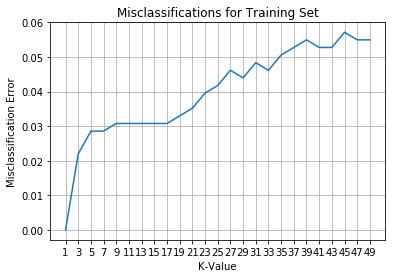

In [8]:
# shwo a fancy graph
plt.grid(True)
plt.xticks(np.arange(1, 50, 2))
plt.plot(neighbors, misclassifications_train)
plt.title('Misclassifications for Training Set')
plt.ylabel('Misclassification Error')
plt.xlabel('K-Value')

Text(0.5, 0, 'K-Value')

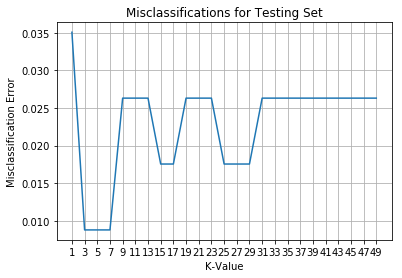

In [9]:
# shwo a fancy graph
plt.grid(True)
plt.xticks(np.arange(1, 50, 2))
plt.plot(neighbors, misclassifications_test)
plt.title('Misclassifications for Testing Set')
plt.ylabel('Misclassification Error')
plt.xlabel('K-Value')